In [86]:
import PIL
import pandas as pd
import numpy as np
import os
import matplotlib
import json
import math
from random import randint
from IPython.display import Image 

In [87]:
resultPath = "../model_tests/Move Classifier/"

results = []
for path in os.listdir(resultPath):
    if not '.DS_Store' in path:
        try:
            
            args = dict(zip(['feature', 'balance', 'batchsize', 'IW', 'IH', 'subset'], path.split("-")))
            args['balance'] = 1 if args['balance'][3:]=="True" else 0
            args['batchsize'] = int(args['batchsize'][2:])
            args['IW'] = int(args['IW'][2:])
            args['IH'] = int(args['IH'][2:])
            args['subset'] = float(args['subset'][3:])
            
            with open(resultPath + path + "/time.json") as json_file:
                time = json.load(json_file)
                args.update(time)
            
            df = pd.read_csv(resultPath + path + "/predictions2.csv")
            predictions = {"TPImages": [], "TNImages": [], "FPImages": [], "FNImages": [],
                          "TPPredictions": [], "TNPredictions": [], "FPPredictions": [], "FNPredictions": []}
            SSE = 0
            for index, row in df.iterrows():
                if row['results'] == 'TP':
                    predictions['TPImages'].append(row['image'])
                    predictions['TPPredictions'].append(row['prediction'])
                elif row['results'] == 'TN':
                    predictions['TNImages'].append(row['image'])
                    predictions['TNPredictions'].append(row['prediction'])
                elif row['results'] == 'FP':
                    predictions['FPImages'].append(row['image'])
                    predictions['FPPredictions'].append(row['prediction'])
                elif row['results'] == 'FN':
                    predictions['FNImages'].append(row['image'])
                    predictions['FNPredictions'].append(row['prediction'])
                else:
                    "This should never happen."
                    
                SSE += (row['prediction'] - row['true'])**2
            
            print(len(predictions['TPImages']), len(predictions['TNImages']), len(predictions['FPImages']), len(predictions['FNImages']))
            
            recall = len(predictions['TPImages'])/(len(predictions['TPImages'])+len(predictions['FNImages']))      
            precision = len(predictions['TPImages'])/(len(predictions['TPImages'])+len(predictions['FPImages']))
            predictions.update({"RMSE": math.sqrt(SSE), "recall": recall, "precision": precision,
                               "TP": len(predictions['TPImages']), "TN": len(predictions['TNImages']), 
                               "FP": len(predictions['FPImages']), "FN": len(predictions['FNImages'])})
            predictions.update(args)
            results.append(predictions)
        except Exception as e:
            print(path, e)        

0 9404 0 34
inventory-BALFalse-BS32-IW320-IH180-SUB0.1 division by zero
188 170 5 1
203 159 1 1
341 369 6 12
376 335 12 5
164 192 5 3
8 9400 0 30
188 165 9 2
195 163 2 4
191 140 31 2
193 165 4 2
0 9400 0 38
inventory-BALFalse-BS16-IW320-IH180-SUB0.1 division by zero
inventory-BALFalse-BS32-IW320-IH180-SUB1.0 [Errno 2] No such file or directory: '../model_tests/Move Classifier/inventory-BALFalse-BS32-IW320-IH180-SUB1.0/time.json'


In [88]:
df = pd.DataFrame.from_dict(results).drop(["TPImages", "TNImages", "FPImages", "FNImages",
                          "TPPredictions", "TNPredictions", "FPPredictions", "FNPredictions"], axis=1)
df.head(10)

,RMSE,recall,precision,TP,TN,FP,FN,feature,balance,batchsize,IW,IH,subset,trainDataTime,trainTime,timePerEpoch,testDataTime,predictTime
0,2.369190,0.994709,0.974093,188,170,5,1,inventory,1,8,320,180,0.5,2.411791,738.266836,36.913342,2.862650,0.472636
1,1.508371,0.995098,0.995098,203,159,1,1,inventory,1,32,320,180,0.5,2.895857,615.531630,30.776581,2.761239,0.446607
2,3.915255,0.966006,0.982709,341,369,6,12,inventory,1,32,160,90,1.0,3.186040,983.333943,9.833339,4.043505,0.689797
3,3.600060,0.986877,0.969072,376,335,12,5,inventory,1,32,320,180,1.0,3.728256,962.748501,9.627485,5.347314,0.810895
4,2.322288,0.982036,0.970414,164,192,5,3,inventory,1,64,320,180,0.5,1.207239,605.155838,30.257792,2.188999,0.455240
5,5.150776,0.210526,1.000000,8,9400,0,30,inventory,0,64,320,180,0.1,8.999526,12677.548134,633.877407,66.969376,9.324262
6,2.825041,0.989474,0.954315,188,165,9,2,inventory,1,32,160,90,0.5,2.811409,341.308287,17.065414,2.002030,0.825457
7,2.506245,0.979899,0.989848,195,163,2,4,inventory,1,32,480,270,0.5,2.828458,1142.878493,57.143925,3.221427,1.626345
8,5.279055,0.989637,0.860360,191,140,31,2,inventory,1,32,640,360,0.5,3.153138,2101.521060,105.076053,2.118429,3.053532
9,2.216653,0.989744,0.979695,193,165,4,2,inventory,1,16,320,180,0.5,1.212749,648.143999,32.407200,2.238399,0.452020


In [89]:
df.describe()

,RMSE,recall,precision,TP,TN,FP,FN,balance,batchsize,IW,IH,subset,trainDataTime,trainTime,timePerEpoch,testDataTime,predictTime
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,3.169294,0.908401,0.967560,204.700000,1125.800000,7.500000,6.200000,0.900000,34.400000,336.000000,189.000000,0.560000,3.243446,2081.643672,96.297854,9.375337,1.815679
std,1.278076,0.245356,0.040006,99.581402,2908.336554,9.009255,8.966605,0.316228,17.708755,140.095206,78.803553,0.263312,2.181237,3753.974604,190.942216,20.263175,2.760700
min,1.508371,0.210526,0.860360,8.000000,140.000000,0.000000,1.000000,0.000000,8.000000,160.000000,90.000000,0.100000,1.207239,341.308287,9.627485,2.002030,0.446607
25%,2.334013,0.980434,0.969408,188.000000,163.500000,2.500000,2.000000,1.000000,32.000000,320.000000,180.000000,0.500000,2.511696,623.684722,20.363509,2.201349,0.459589
50%,2.665643,0.988175,0.976894,192.000000,167.500000,5.000000,2.500000,1.000000,32.000000,320.000000,180.000000,0.500000,2.862157,850.507668,31.591891,2.811944,0.750346
75%,3.836456,0.989717,0.988063,201.000000,299.250000,8.250000,4.750000,1.000000,32.000000,320.000000,180.000000,0.500000,3.177814,1102.992356,52.086279,3.837985,1.426123
max,5.279055,0.995098,1.000000,376.000000,9400.000000,31.000000,30.000000,1.000000,64.000000,640.000000,360.000000,1.000000,8.999526,12677.548134,633.877407,66.969376,9.324262


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RMSE           10 non-null     float64
 1   recall         10 non-null     float64
 2   precision      10 non-null     float64
 3   TP             10 non-null     int64  
 4   TN             10 non-null     int64  
 5   FP             10 non-null     int64  
 6   FN             10 non-null     int64  
 7   feature        10 non-null     object 
 8   balance        10 non-null     int64  
 9   batchsize      10 non-null     int64  
 10  IW             10 non-null     int64  
 11  IH             10 non-null     int64  
 12  subset         10 non-null     float64
 13  trainDataTime  10 non-null     float64
 14  trainTime      10 non-null     float64
 15  timePerEpoch   10 non-null     float64
 16  testDataTime   10 non-null     float64
 17  predictTime    10 non-null     float64
dtypes: float64(9)

In [91]:
feature = "inventory"
batchsize = 8
shrink = .5
IW, IH = (int(640*shrink), int(360*shrink))
subset = .5
balance = 1
sample = {}
for item in results:
    if item["feature"] == feature and item["batchsize"] == batchsize and item["IW"] == IW and item["IH"] == IH and item["subset"] == subset and item["balance"] == balance:
        sample = item
print("RMSE:", sample["RMSE"], "| Recall:", sample["recall"], "| Precision:", sample["precision"])
print("True Positives:", sample["TP"])
print("True Negatives:", sample["TN"])
print("False Positives:", sample["FP"])
print("False Negatives:", sample["FN"])
print("Train Time Total:", sample["trainTime"], "| AVG Time Per Epoch:", sample["timePerEpoch"], "| Epochs Ran:", (int(sample["trainTime"]/sample["timePerEpoch"])))



RMSE: 2.3691902363580186 | Recall: 0.9947089947089947 | Precision: 0.9740932642487047
True Positives: 188
True Negatives: 170
False Positives: 5
False Negatives: 1
Train Time Total: 738.2668359279633 | AVG Time Per Epoch: 36.913341796398164 | Epochs Ran: 20


../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-17-T04-05-05-219586/2217.jpg
0.9907912


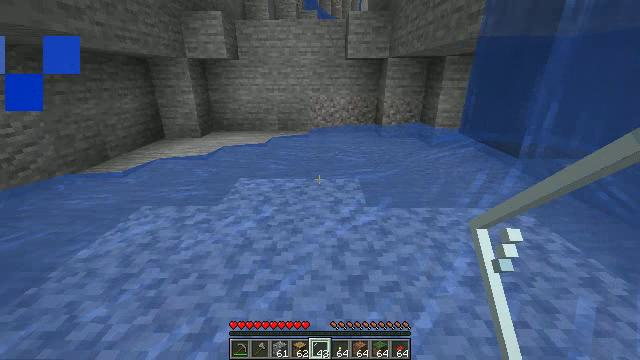

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-17-T02-13-25-111899/2003.jpg
0.9847965


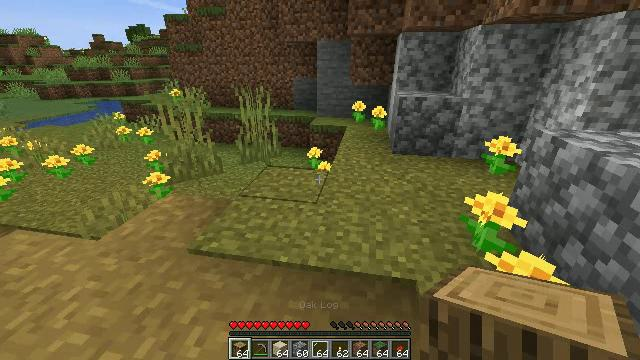

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-16-T01-49-55-398136/4056.jpg
0.9981741


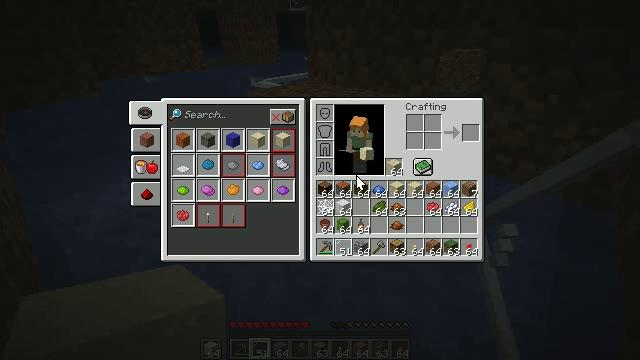

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-43-35-471438/5974.jpg
0.99293303


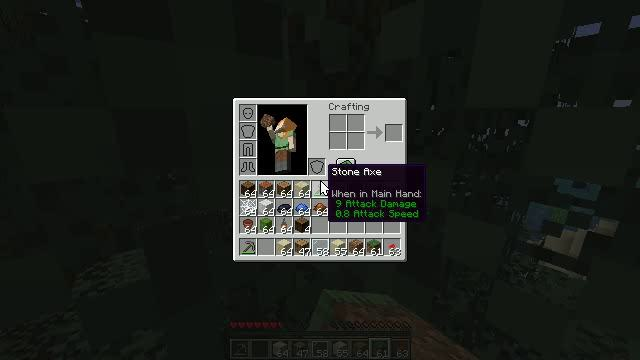

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-17-T04-05-05-219586/2217.jpg
0.9907912


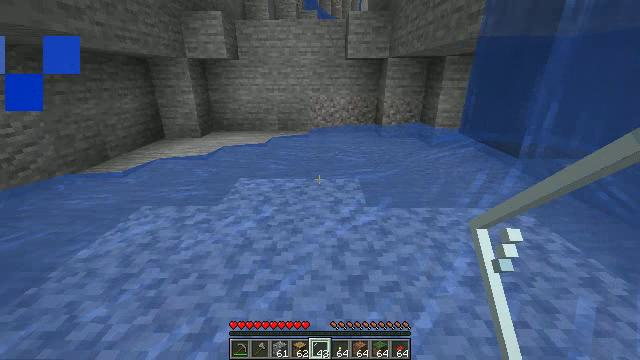

In [93]:
for i in range(0, 5):
    index = randint(0, len(sample["TPImages"]))
    print(sample["TPImages"][index])
    print(sample["TPPredictions"][index])
    display(Image(filename=sample["TPImages"][index]))

In [85]:
resultPath = "../model_tests/Move Classifier/"


for path in os.listdir(resultPath):
    results = []
    if not '.DS_Store' in path:
        try:
            df = pd.read_csv(resultPath + path + "/predictions.csv")
            for index, row in df.iterrows():
                results.append({"image": row['image'].split("'")[3], 
                                "prediction": row['prediction'], 
                                "true": row['true'], 
                                "results": row['results']})
            df2 = pd.DataFrame.from_dict(results)
            df2.to_csv(resultPath + path + "/predictions2.csv", index=False)
        except:
            print(resultPath + path)
            

../model_tests/Move Classifier/inventory-BALFalse-BS32-IW320-IH180-SUB1.0
